In [1]:
from preprocessing import *

/home/sam/anaconda3/envs/YOLOv5/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cell_bbox = []
one_cell_indices = []

for i in range(len(boxes_list)):
    if len(boxes_list[i]) == 1:
        cell_bbox.append(boxes_list[i])
        one_cell_indices.append(i)

In [3]:
one_cell_images = []

j = 0

for i in range(len(images_path)):
    temp_path = int(images_path[i][12:-4])
    if temp_path == one_cell_indices[j]:
        one_cell_images.append(images[i])
        j += 1
        if j == len(one_cell_indices):
            break

In [4]:
def tensor_to_tuple(tensor):
    return tuple(tensor.tolist()[0])

In [5]:
print(len(cell_bbox), len(one_cell_images))

182 182


In [6]:
cropped_images = []

for i in range(len(one_cell_images)):
    cropped_images.append(Image.fromarray(one_cell_images[i]).crop(tuple(cell_bbox[i].tolist()[0])))
    #print() #.crop(cell_bbox[i].tolist())
    #print(cell_bbox[i].tolist(), i)

In [7]:
#show_drawn_boxes(4)

In [8]:
cropped_images.insert(0, cropped_images[0])
cropped_images.insert(0, cropped_images[2])
cropped_images.insert(0, cropped_images[3])
cropped_images.insert(0, cropped_images[4])
cropped_images.insert(0, cropped_images[6])
cropped_images.insert(0, cropped_images[7])
cropped_images.insert(0, cropped_images[8])
cropped_images.insert(0, cropped_images[9])
cropped_images.insert(0, cropped_images[10])
cropped_images.insert(0, cropped_images[11])

In [9]:
for i in range(len(cropped_images) - 10):
    cropped_images.pop()

In [10]:
import random

In [11]:
rand_cell = one_cell_images[random.randint(0, len(one_cell_images) + 1)]
print(type(Image.fromarray(rand_cell)))

<class 'PIL.Image.Image'>


In [12]:
generated_images = []

for i in range(10):
    temp_image = Image.new('L', (696, 520))
    for j in range(20):
        randx = random.randint(0,696)
        randy = random.randint(0,520)
        
        rand_cell = Image.fromarray(one_cell_images[random.randint(0, len(one_cell_images) - 1)])
        #rand_cell = Image.open(images_path[indices])

        temp_image.paste(rand_cell, (randx, randy))

    generated_images.append(temp_image)

In [13]:
for image in range(len(one_cell_images)):
    one_cell_images[image] = Image.fromarray(one_cell_images[image])
    one_cell_images[image].convert("RGB")

In [14]:
threshold = 0.1

for i in range(len(cropped_images)):
    cropped_images[i] = np.array(cropped_images[i]) > 50

In [15]:
Image.fromarray(cropped_images[0]).save("img.png", "PNG")

In [16]:
def black_to_alpha(img):
    img = Image.fromarray(img)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    
    return img

In [17]:
#img = black_to_alpha(np.array(cropped_images[0]))
#img = Image.fromarray(img)
#img = img.convert("RGBA")
#datas = img.getdata()

#print(datas)

In [18]:
black_to_alpha(np.array(cropped_images[4])).save("image.png", "PNG")

In [19]:
#from skimage import util 

In [20]:
#cropped_images[0] = util.invert(cropped_images[0])

In [21]:
#for i in range(len(cropped_images)):
#    cropped_images[i] = white_to_black(cropped_images[i])

In [22]:
cropped_images[5] = black_to_alpha(np.array(cropped_images[5]))

In [23]:
for i in range(len(cropped_images)):
    cropped_images[i] = black_to_alpha(np.array(cropped_images[i]))

In [24]:
print(len(one_cell_indices))

182


In [25]:
generated_images = []
one_cell_bboxes = []

c = 0
for j in range(2000):
    test = torch.empty(0, 4)
    temp_bbox = torch.empty((35))
    test_image = Image.new('RGB', (696, 520), color=(0, 0, 0, 0))
    for i in range(random.randint(35, 50)):
        rand_image = random.randint(0, len(cropped_images) - 1)
        box = boxes_list[one_cell_indices[rand_image]]
        #temp_bbox = torch.cat((temp_bbox, box))
        test = torch.cat((test, boxes_list[one_cell_indices[rand_image]]))
        #one_cell_bboxes.append(boxes_list[one_cell_indices[rand_image]])
        #temp_background = Image.new('RGBA', (696, 520), color=(0, 0, 0, 0))
        randx = random.randint(0, 660)
        randy = random.randint(0, 480)
        #temp_background.paste(cropped_images[5], (randx, randy))
        test_image.paste(cropped_images[rand_image], (randx, randy), Image.fromarray(np.array(cropped_images[rand_image])[:,:,3]))

    #test_image.save("data/images/{number}.png".format(number=c), "PNG")
    generated_images.append(test_image) 
    one_cell_bboxes.append(test)
    c += 1
    #plt.imshow(test_image, cmap="gray")

In [26]:
from torchvision import transforms

In [30]:
show_drawn_boxes(np.array(generated_images), 0)

/tmp/ipykernel_519/867509240.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  show_drawn_boxes(np.array(generated_images), 0)
/tmp/ipykernel_519/867509240.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  show_drawn_boxes(np.array(generated_images), 0)


TypeError: '>' not supported between instances of 'Image' and 'int'

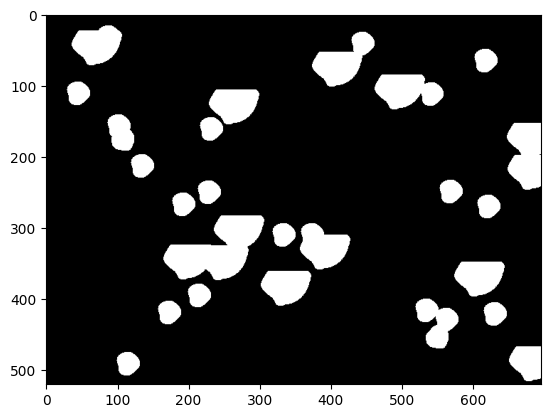

In [ ]:
plt.imshow(generated_images[1])

In [32]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [39]:
print(len(one_cell_bboxes[0]))

39


In [40]:
print(one_cell_bboxes[0])

tensor([[227., 408., 260., 442.],
        [419.,   0., 490.,  49.],
        [438.,   2., 471.,  35.],
        [419.,   0., 490.,  49.],
        [211., 387., 277., 465.],
        [211., 387., 277., 465.],
        [ 11., 311.,  44., 345.],
        [145., 306., 212., 369.],
        [145., 306., 212., 369.],
        [ 11., 311.,  44., 345.],
        [162., 321., 193., 354.],
        [438.,   2., 471.,  35.],
        [ 11., 311.,  44., 345.],
        [204.,   0., 262.,  51.],
        [419.,   0., 490.,  49.],
        [438.,   2., 471.,  35.],
        [162., 321., 193., 354.],
        [ 11., 311.,  44., 345.],
        [204.,   0., 262.,  51.],
        [ 11., 311.,  44., 345.],
        [145., 306., 212., 369.],
        [216.,   5., 249.,  37.],
        [438.,   2., 471.,  35.],
        [419.,   0., 490.,  49.],
        [  0., 295.,  63., 362.],
        [162., 321., 193., 354.],
        [  0., 295.,  63., 362.],
        [145., 306., 212., 369.],
        [227., 408., 260., 442.],
        [438.,

In [57]:
box = [[227., 408., 260., 442.],
        [419.,   0., 490.,  49.]]
        #[438.,   2., 471.,  35.],
        #[419.,   0., 490.,  49.],
        #[211., 387., 277., 465.]]
"""[211., 387., 277., 465.],
        [ 11., 311.,  44., 345.],
        [145., 306., 212., 369.],
        [145., 306., 212., 369.],
        [ 11., 311.,  44., 345.],
        [162., 321., 193., 354.],
        [438.,   2., 471.,  35.],
        [ 11., 311.,  44., 345.],
        [204.,   0., 262.,  51.],
        [419.,   0., 490.,  49.],
        [438.,   2., 471.,  35.],
        [162., 321., 193., 354.],
        [ 11., 311.,  44., 345.],
        [204.,   0., 262.,  51.],
        [ 11., 311.,  44., 345.],
        [145., 306., 212., 369.],
        [216.,   5., 249.,  37.],
        [438.,   2., 471.,  35.],
        [419.,   0., 490.,  49.],
        [  0., 295.,  63., 362.],
        [162., 321., 193., 354.],
        [  0., 295.,  63., 362.],
        [145., 306., 212., 369.],
        [227., 408., 260., 442.],
        [438.,   2., 471.,  35.],
        [227., 408., 260., 442.],
        [  0., 295.,  63., 362.],
        [227., 408., 260., 442.],
        [216.,   5., 249.,  37.],
        [  0., 295.,  63., 362.],
        [227., 408., 260., 442.],
        [216.,   5., 249.,  37.],
        [162., 321., 193., 354.],
        [227., 408., 260., 442.]]"""
#box = [330, 190, 660, 355]
box = torch.tensor(box)
#box = box.unsqueeze(0)
img = transform(generated_images[0])

img = draw_bounding_boxes(img, box, width=5, colors="red")

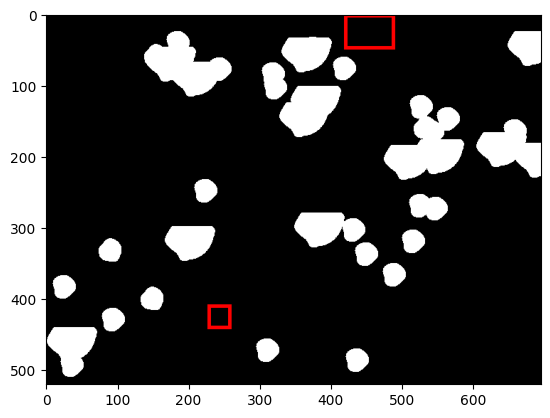

In [58]:
img = transforms.ToPILImage()(img)

plt.imshow(img)

In [ ]:
print(one_cell_bboxes[1])

tensor([[162., 321., 193., 354.],
        [145., 306., 212., 369.],
        [  0., 295.,  63., 362.],
        [162., 321., 193., 354.],
        [438.,   2., 471.,  35.],
        [216.,   5., 249.,  37.],
        [419.,   0., 490.,  49.],
        [216.,   5., 249.,  37.],
        [145., 306., 212., 369.],
        [211., 387., 277., 465.],
        [162., 321., 193., 354.],
        [216.,   5., 249.,  37.],
        [216.,   5., 249.,  37.],
        [211., 387., 277., 465.],
        [162., 321., 193., 354.],
        [438.,   2., 471.,  35.],
        [211., 387., 277., 465.],
        [204.,   0., 262.,  51.],
        [211., 387., 277., 465.],
        [204.,   0., 262.,  51.],
        [ 11., 311.,  44., 345.],
        [162., 321., 193., 354.],
        [204.,   0., 262.,  51.],
        [ 11., 311.,  44., 345.],
        [162., 321., 193., 354.],
        [227., 408., 260., 442.],
        [438.,   2., 471.,  35.],
        [204.,   0., 262.,  51.],
        [ 11., 311.,  44., 345.],
        [438.,

In [ ]:
print(one_cell_bboxes[0])

tensor([[162., 321., 193., 354.],
        [211., 387., 277., 465.],
        [438.,   2., 471.,  35.],
        [419.,   0., 490.,  49.],
        [438.,   2., 471.,  35.],
        [419.,   0., 490.,  49.],
        [145., 306., 212., 369.],
        [  0., 295.,  63., 362.],
        [227., 408., 260., 442.],
        [227., 408., 260., 442.],
        [438.,   2., 471.,  35.],
        [227., 408., 260., 442.],
        [ 11., 311.,  44., 345.],
        [  0., 295.,  63., 362.],
        [216.,   5., 249.,  37.],
        [211., 387., 277., 465.],
        [216.,   5., 249.,  37.],
        [216.,   5., 249.,  37.],
        [216.,   5., 249.,  37.],
        [145., 306., 212., 369.],
        [216.,   5., 249.,  37.],
        [419.,   0., 490.,  49.],
        [  0., 295.,  63., 362.],
        [419.,   0., 490.,  49.],
        [438.,   2., 471.,  35.],
        [  0., 295.,  63., 362.],
        [211., 387., 277., 465.],
        [162., 321., 193., 354.],
        [211., 387., 277., 465.],
        [204.,

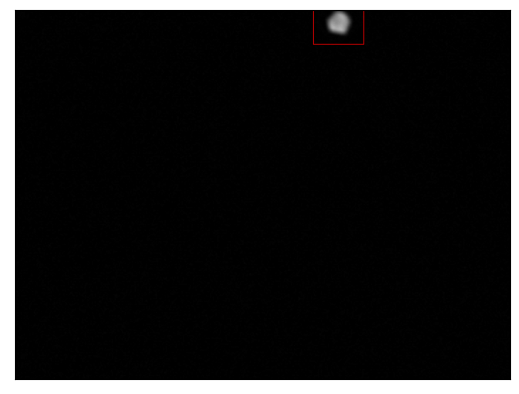

In [ ]:
convert_tensor = transforms.ToTensor()
testy = read_image("cell_images/0.png")
googa = draw_bounding_boxes(testy, boxes_list[1], colors="red")
show(googa)

In [ ]:
import torchvision.transforms as T

In [ ]:
transform = T.ToPILImage()

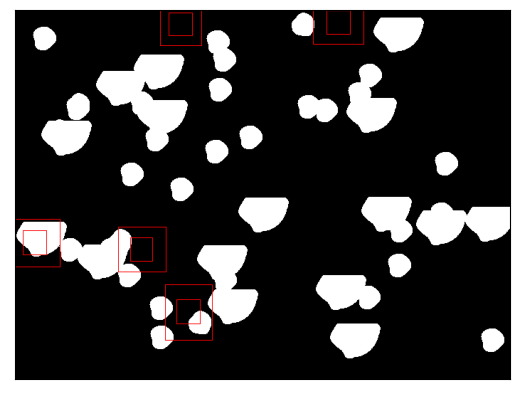

In [ ]:
imag = Image.open("data/images/train/0.png")
imag = imag.convert('RGB')
imag.save("imag.png", "PNG")

imag = read_image("imag.png")
drawn_boxes = draw_bounding_boxes(imag, one_cell_bboxes[0], colors="red")
show(drawn_boxes)

In [ ]:
for i in range(len(generated_images)):
    generated_images[i].convert("L")
    generated_images[i].save("temp2/{number}.png".format(number=i), "PNG")


In [ ]:
print(np.array(generated_images[0]).shape)

(520, 696, 3)


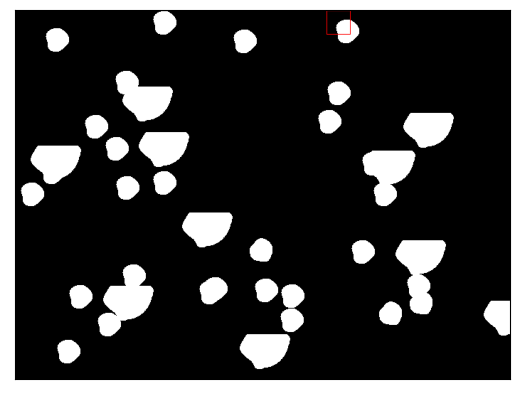

In [ ]:
show_drawn_boxes(0)

In [ ]:
#generated_images[0] = np.array(generated_images[0])
#generated_images[0] = generated_images[0][:][:3]
#print(np.array(generated_images[0]).shape)

In [ ]:
#generated_images[0].convert("RGB")
#generated_images[0].save("imag.png", "PNG")
#imag = read_image("imag.png")
#drawn_boxes = draw_bounding_boxes(imag, one_cell_bboxes, colors="red")
#show(drawn_boxes)

In [ ]:
#for box in range(len(one_cell_bboxes)):
#    one_cell_bboxes[box] = normalize(one_cell_bboxes[box], p=1.0, dim=1)

In [ ]:
write_box_info_to_file(one_cell_bboxes)

UPDATE
